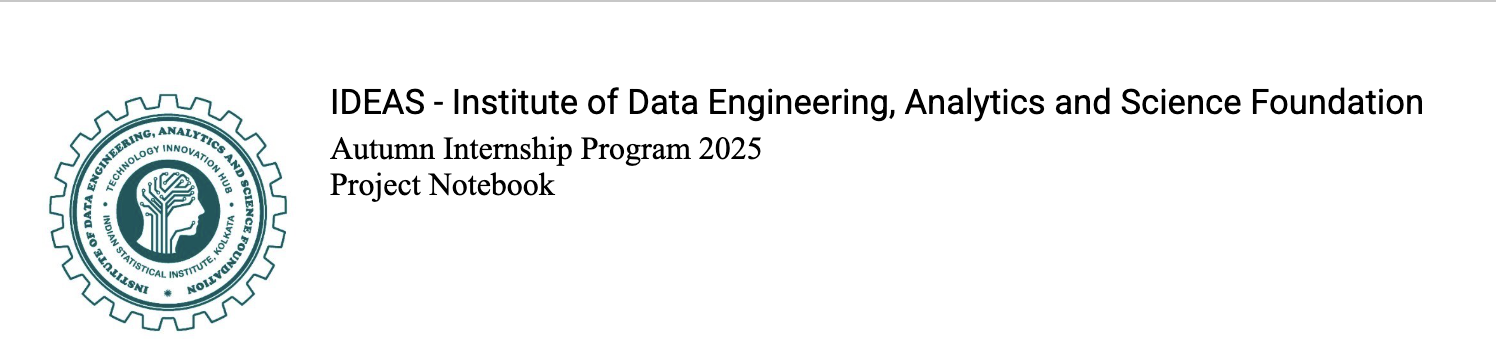

# **PROJECT REPORT**

Submitted by - Laxman Soni, Section 1

## 1. Diabetes Prediction: Classification Comparison + Metrics + Evaluation

Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report

Load Dataset

In [2]:
# Load dataset
url = 'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Exploratory Data Analysis (EDA)

In [3]:
# Basic EDA
print(df.shape)
print(df.info())
df.describe()

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Correlation Heatmap

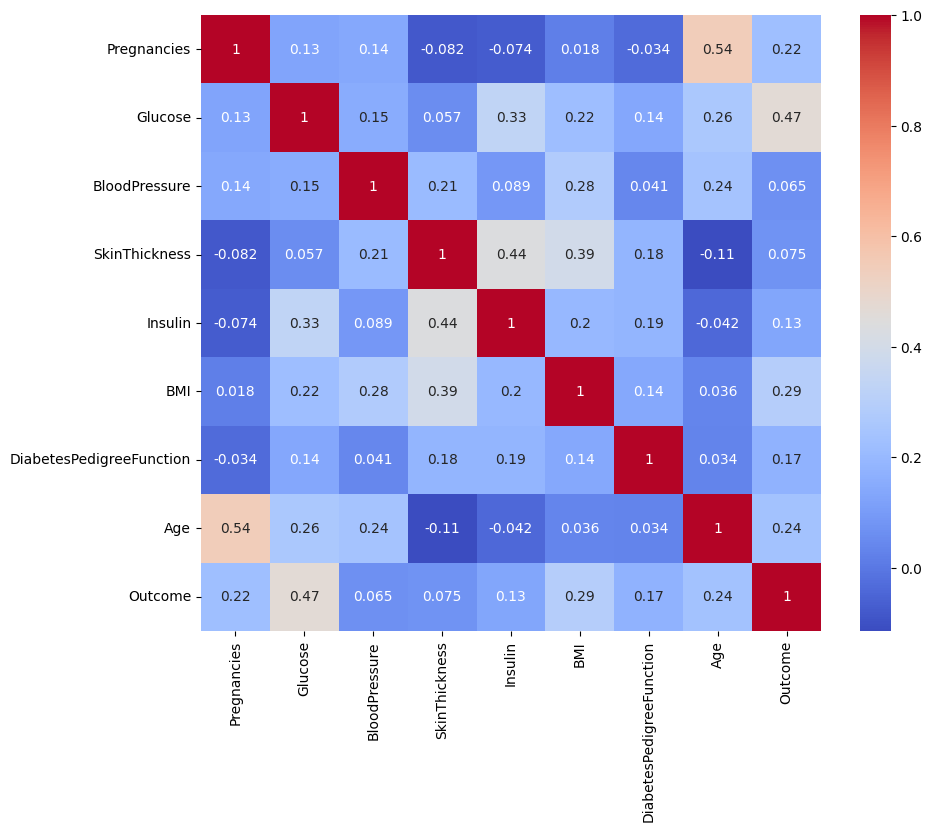

In [4]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Data Preprocessing & Train/Test Split

In [5]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape)

(614, 8) (154, 8)


Data Scaling

In [6]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Machine Learning Models

In [7]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("KNN Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Results:
Accuracy: 0.7012987012987013
[[80 20]
 [26 28]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       100
           1       0.58      0.52      0.55        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



SVM Model

In [8]:
# SVM Model
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
y_proba_svm = svm.predict_proba(X_test_scaled)[:, 1] # For ROC curve

print("SVM Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Results:
Accuracy: 0.7207792207792207
[[83 17]
 [26 28]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       100
           1       0.62      0.52      0.57        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154



### Evaluation

Confusion Matrix

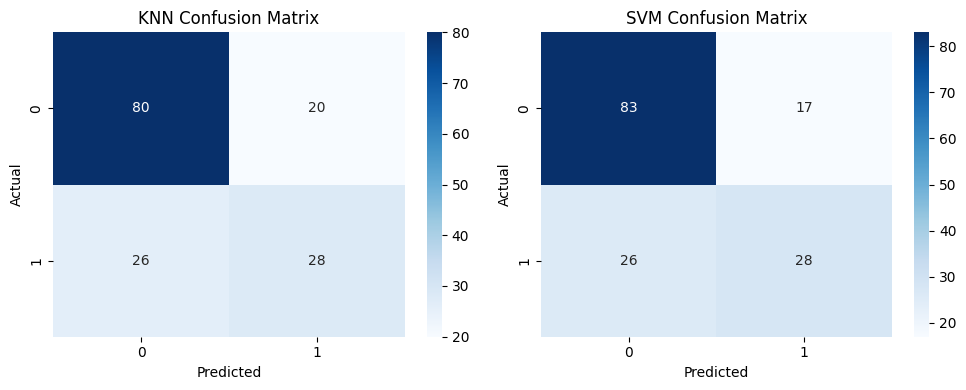

In [9]:
# Confusion Matrix Plot
y_pred_knn = knn.predict(X_test_scaled)
y_pred_svm = svm.predict(X_test_scaled)
# Store results
models = {
    "KNN": (knn, y_pred_knn),
    "SVM": (svm, y_pred_svm)
}

plt.figure(figsize=(10, 4))
for i, (name, (model, y_pred)) in enumerate(models.items()):
    plt.subplot(1, 2, i + 1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.tight_layout()
plt.show()

ROC Curves

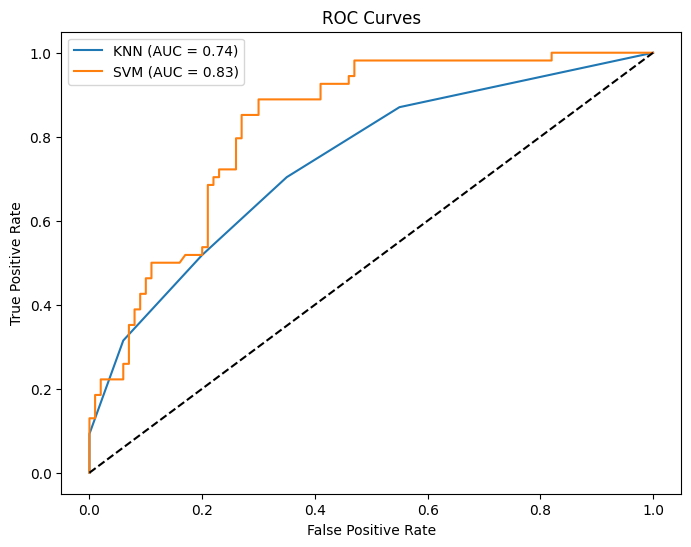

In [10]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))
models_for_roc = {
    "KNN": knn,
    "SVM": svm
}

for name, model in models_for_roc.items():
    if name == "KNN": # KNN needs predict_proba on the scaled test set
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else: # SVM already calculated proba above
        y_proba = y_proba_svm

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

Metric Comparison Table

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []
for name, (model, y_pred) in models.items():
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1 Score": f1_score(y_test, y_pred, zero_division=0)
    })

metrics_df = pd.DataFrame(results)
print(metrics_df)

  Model  Accuracy  Precision    Recall  F1 Score
0   KNN  0.701299   0.583333  0.518519  0.549020
1   SVM  0.720779   0.622222  0.518519  0.565657


## 2. Survival Prediction Using the Titanic Dataset

Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report, f1_score

Data Loading

In [15]:
# Load dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Managing missing values & EDA

In [17]:
# Fill missing values
X_train = X_train.fillna(X_train.median(numeric_only=True))
X_test = X_test.fillna(X_train.median(numeric_only=True)) # Use train median for test
# Basic EDA after filling/dropping
print(df.shape)
print(df.info())
df.describe()

(891, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


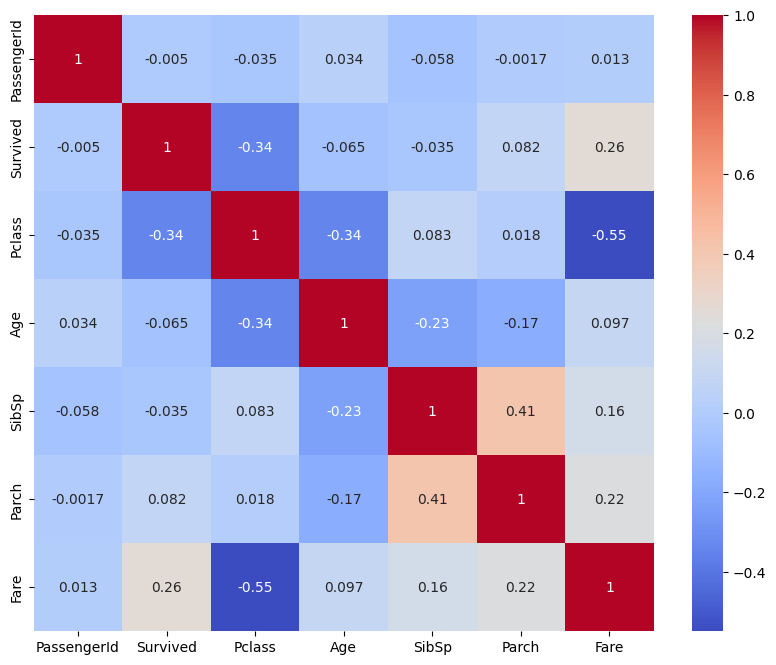

In [18]:
# Correlation Heatmap for numeric features
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

Data Preprocessing & Train/Test Split

In [19]:
# Select only numeric features (and drop PassengerId, Ticket, Name that are non-predictive)
numeric_df = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

X = numeric_df.drop('Survived', axis=1)
y = numeric_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape)

(712, 5) (179, 5)


Data Scaling

In [21]:
# Fill missing Age values with median (Best practice is to use X_train median for both sets)
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].median())
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].median())
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Machine Learning Models

KNN Model

In [22]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("KNN Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Results:
Accuracy: 0.6201117318435754
[[79 31]
 [37 32]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       110
           1       0.51      0.46      0.48        69

    accuracy                           0.62       179
   macro avg       0.59      0.59      0.59       179
weighted avg       0.61      0.62      0.62       179



SVM Model

In [23]:
# SVM Model
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
y_proba_svm = svm.predict_proba(X_test_scaled)[:, 1] # For ROC curve

print("SVM Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Results:
Accuracy: 0.6815642458100558
[[92 18]
 [39 30]]
              precision    recall  f1-score   support

           0       0.70      0.84      0.76       110
           1       0.62      0.43      0.51        69

    accuracy                           0.68       179
   macro avg       0.66      0.64      0.64       179
weighted avg       0.67      0.68      0.67       179



Confusion Matrix

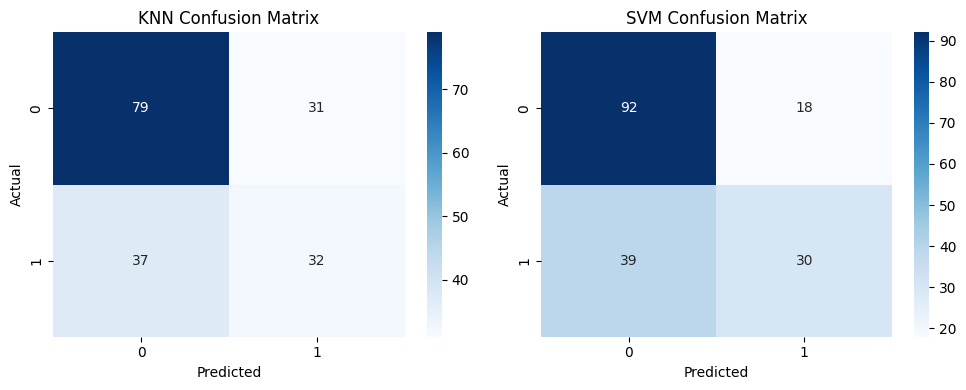

In [24]:
# Confusion Matrix Plot
y_pred_knn = knn.predict(X_test_scaled)
y_pred_svm = svm.predict(X_test_scaled)
# Store results
models = {
    "KNN": (knn, y_pred_knn),
    "SVM": (svm, y_pred_svm)
}

plt.figure(figsize=(10, 4))
for i, (name, (model, y_pred)) in enumerate(models.items()):
    plt.subplot(1, 2, i + 1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.tight_layout()
plt.show()

ROC Curves

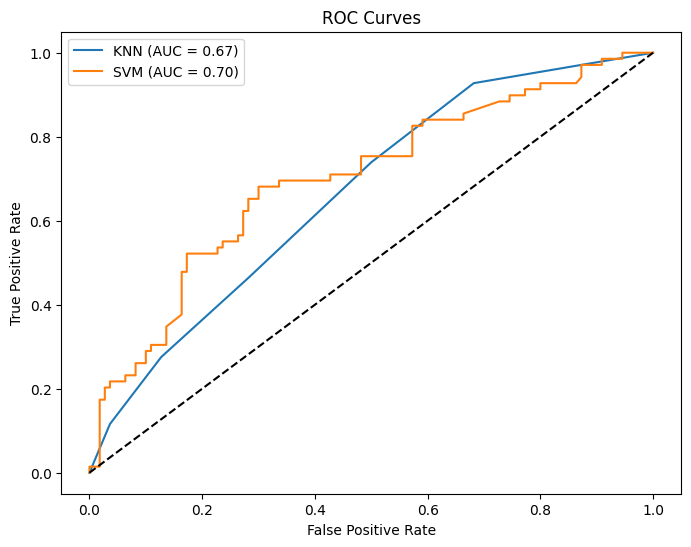

In [30]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))
models_for_roc = {
    "KNN": knn,
    "SVM": svm
}

for name, (model, y_pred) in models.items():
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

Metric Comparison Table

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

results = []
for name, (model, y_pred) in models.items():
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

metrics_df = pd.DataFrame(results)
print(metrics_df)

  Model  Accuracy  Precision    Recall  F1 Score
0   KNN  0.620112   0.507937  0.463768  0.484848
1   SVM  0.681564   0.625000  0.434783  0.512821
